In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

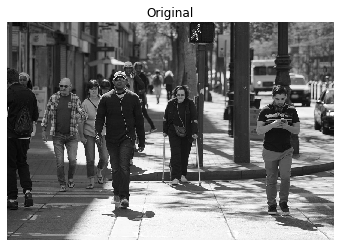

In [2]:
img = cv2.imread("data/hw.jpg",0)

plt.figure(), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

# Cascade Classifier

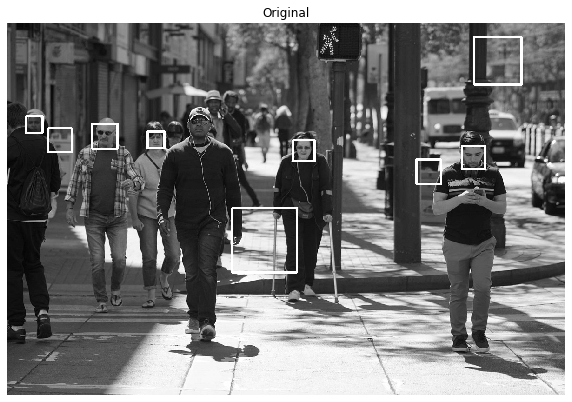

In [3]:
face = cv2.CascadeClassifier("data/haarcascade_frontalface_default.xml")

face_rectangle = face.detectMultiScale(image=img, scaleFactor=1.08, minNeighbors=3)

for x,y,w,h in face_rectangle:
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0), 4)
    
plt.figure(figsize=(10,10)), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

# HOG Descriptor

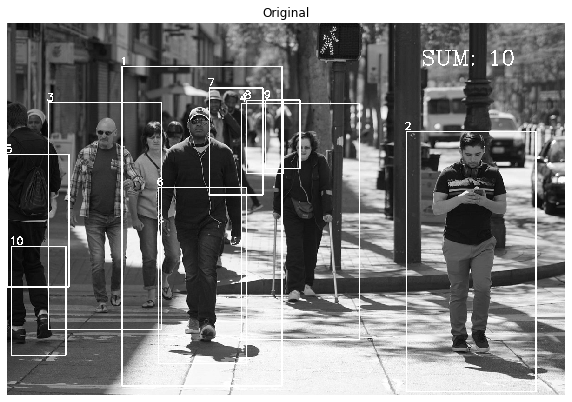

In [4]:
# read again
img = cv2.imread("data/hw.jpg",0)

# define hog Descriptor
hog = cv2.HOGDescriptor()

# add SVM
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

# Detect
(rects, weights) = hog.detectMultiScale(img, padding=(5,5), scale=1.05)

sum_ = 0
for (i,(X,Y,W,H)) in enumerate(rects):
    
    cv2.rectangle(img, (X,Y), (X+W, Y+H), (255, 0, 0), 2)
    cv2.putText(img, f"{i+1}", (X-4, Y-4),cv2.FONT_HERSHEY_SIMPLEX, .75, (255,255,255),2)
    
    sum_ += 1

cv2.putText(img, f"SUM: {sum_}", (890, 90),cv2.FONT_HERSHEY_COMPLEX, 1.5, (255,0,0),2)
    
plt.figure(figsize=(10,10)), plt.title("Original"), plt.imshow(img,cmap="gray"), plt.axis("off");